In [88]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [89]:
df = pd.read_csv('2018_2019_24-59mos_stunting_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 41
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'drinksafe', 'makesafe', 'wcooking', 'whands', 'collect',
       'burn', 'composting', 'dump', 'segregate', 'stunting'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,stunting
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,1
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,1
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,0


In [90]:
data = df[["bw_grams","psoc_hh","age_hh",
           "whands","psccat_mom","drinkingwater","educ_mom",
          "stunting"]]

In [91]:
data.head()

,bw_grams,psoc_hh,age_hh,whands,psccat_mom,drinkingwater,educ_mom,stunting
0,2400,6,37,2,0,0,2,1
1,2500,99,54,2,2,1,1,0
2,2500,6,38,2,0,0,2,1
3,3200,6,36,2,0,0,2,0
4,2800,8,44,2,0,1,2,0


In [92]:
data['drinkingwater'].value_counts()

0    8740
1    5721
Name: drinkingwater, dtype: int64

In [93]:
data.columns

Index(['bw_grams', 'psoc_hh', 'age_hh', 'whands', 'psccat_mom',
       'drinkingwater', 'educ_mom', 'stunting'],
      dtype='object')

In [94]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())
data = data.drop_duplicates()

'Total number of of Duplicates present in data: 292'

In [95]:
data = data.drop_duplicates()

In [96]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

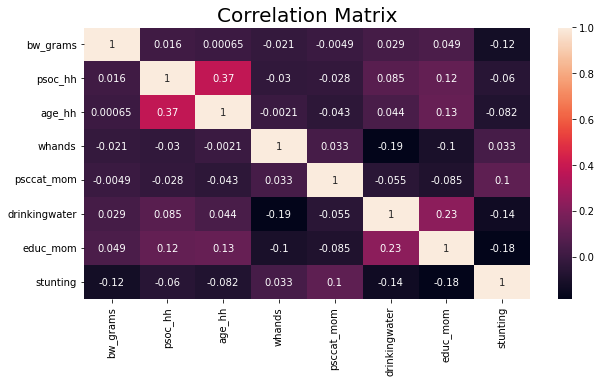

In [97]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [98]:
data['stunting'].value_counts()

0    9542
1    4627
Name: stunting, dtype: int64

In [99]:
Final = df[["bw_grams","psoc_hh","age_hh",
           "whands","psccat_mom","drinkingwater","educ_mom"]]
Target =df['stunting']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [101]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.680
Accuracy score : 0.6892499135845144


In [102]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.987
Accuracy score:  0.6657449014863464


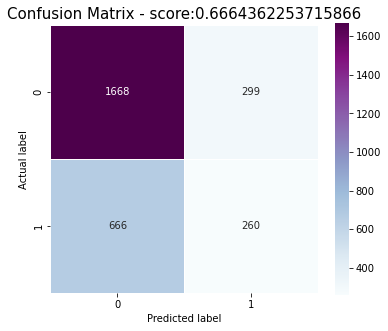

              precision    recall  f1-score   support

           0       0.71      0.85      0.78      1967
           1       0.47      0.28      0.35       926

    accuracy                           0.67      2893
   macro avg       0.59      0.56      0.56      2893
weighted avg       0.63      0.67      0.64      2893



In [103]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


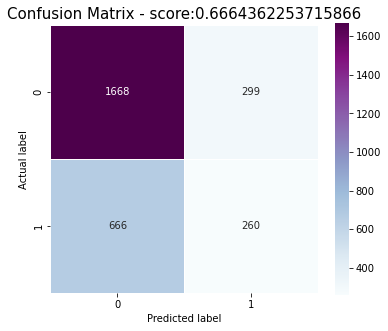

              precision    recall  f1-score   support

           0       0.71      0.85      0.78      1967
           1       0.47      0.28      0.35       926

    accuracy                           0.67      2893
   macro avg       0.59      0.56      0.56      2893
weighted avg       0.63      0.67      0.64      2893



In [104]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [105]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.920
Test score: 0.668


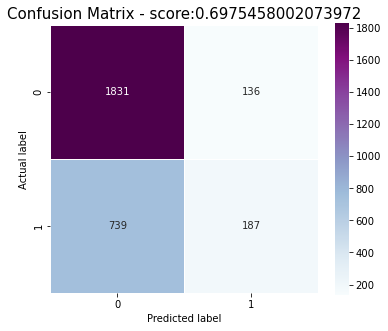

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1967
           1       0.58      0.20      0.30       926

    accuracy                           0.70      2893
   macro avg       0.65      0.57      0.55      2893
weighted avg       0.67      0.70      0.64      2893



In [106]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))

C:\Users\Supervisor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

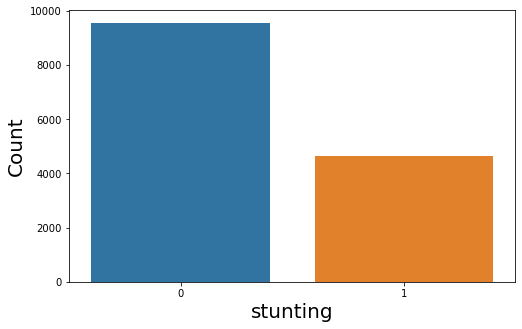

In [107]:
stunting_label = data.stunting.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(stunting_label.index, stunting_label);
plt.xlabel('stunting', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [108]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [109]:
data.columns

Index(['bw_grams', 'psoc_hh', 'age_hh', 'whands', 'psccat_mom',
       'drinkingwater', 'educ_mom', 'stunting'],
      dtype='object')

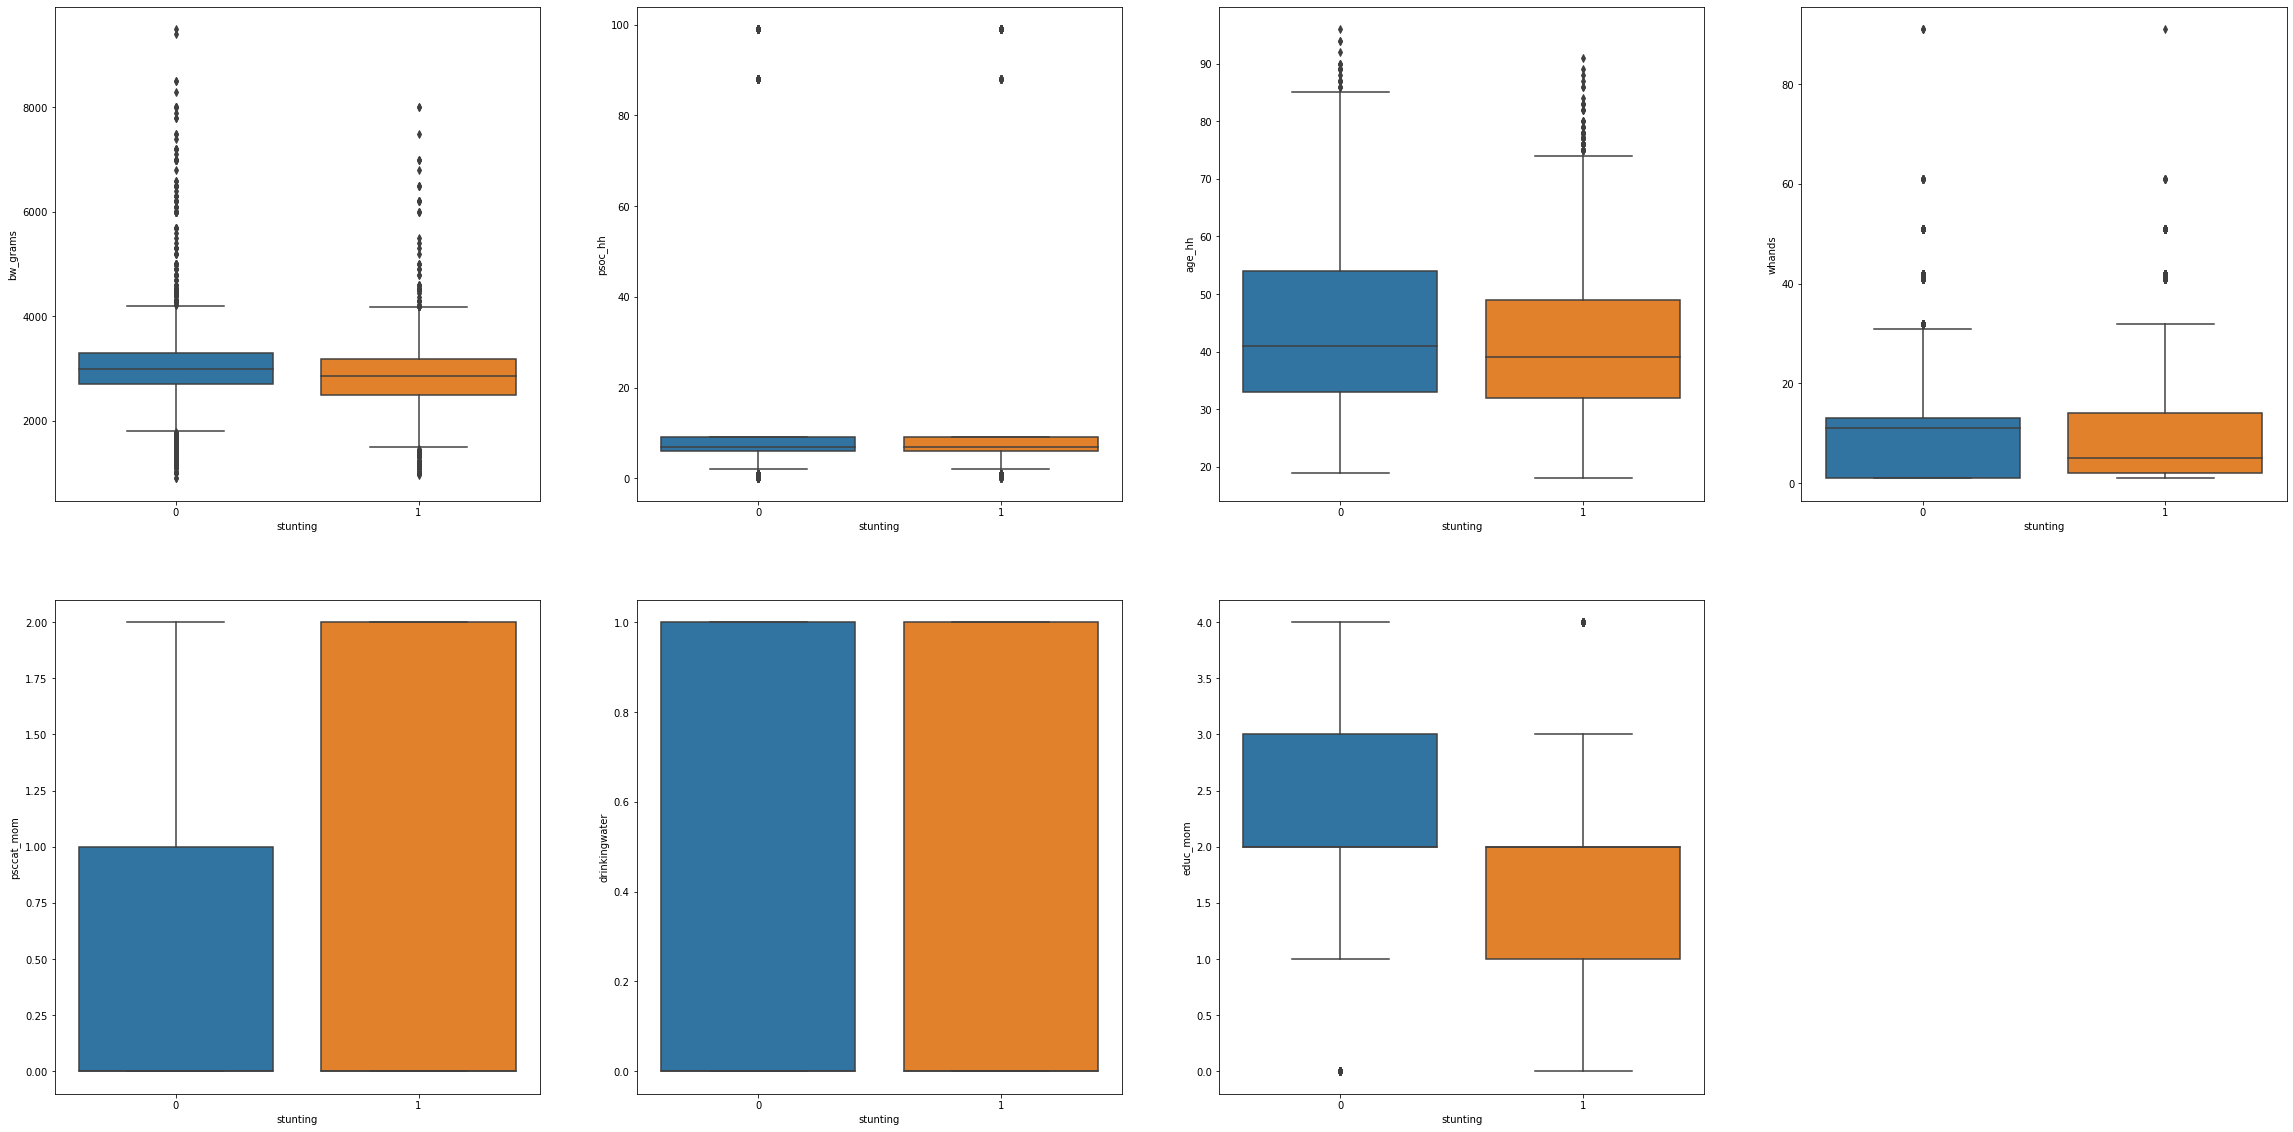

In [110]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [111]:
lr,ur=outlier(data['whands'][data.stunting==0])
data.drop(data.index[(data.whands > ur) & (data.stunting == 0)],inplace=True)
data.drop(data.index[(data.whands < lr) & (data.stunting == 0)],inplace=True)
data.value_counts('stunting')

stunting
0    8505
1    4627
dtype: int64

In [112]:
lr,ur=outlier(data['whands'][data.stunting==1])
data.drop(data.index[(data.whands > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.whands < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    8505
1    4042
dtype: int64

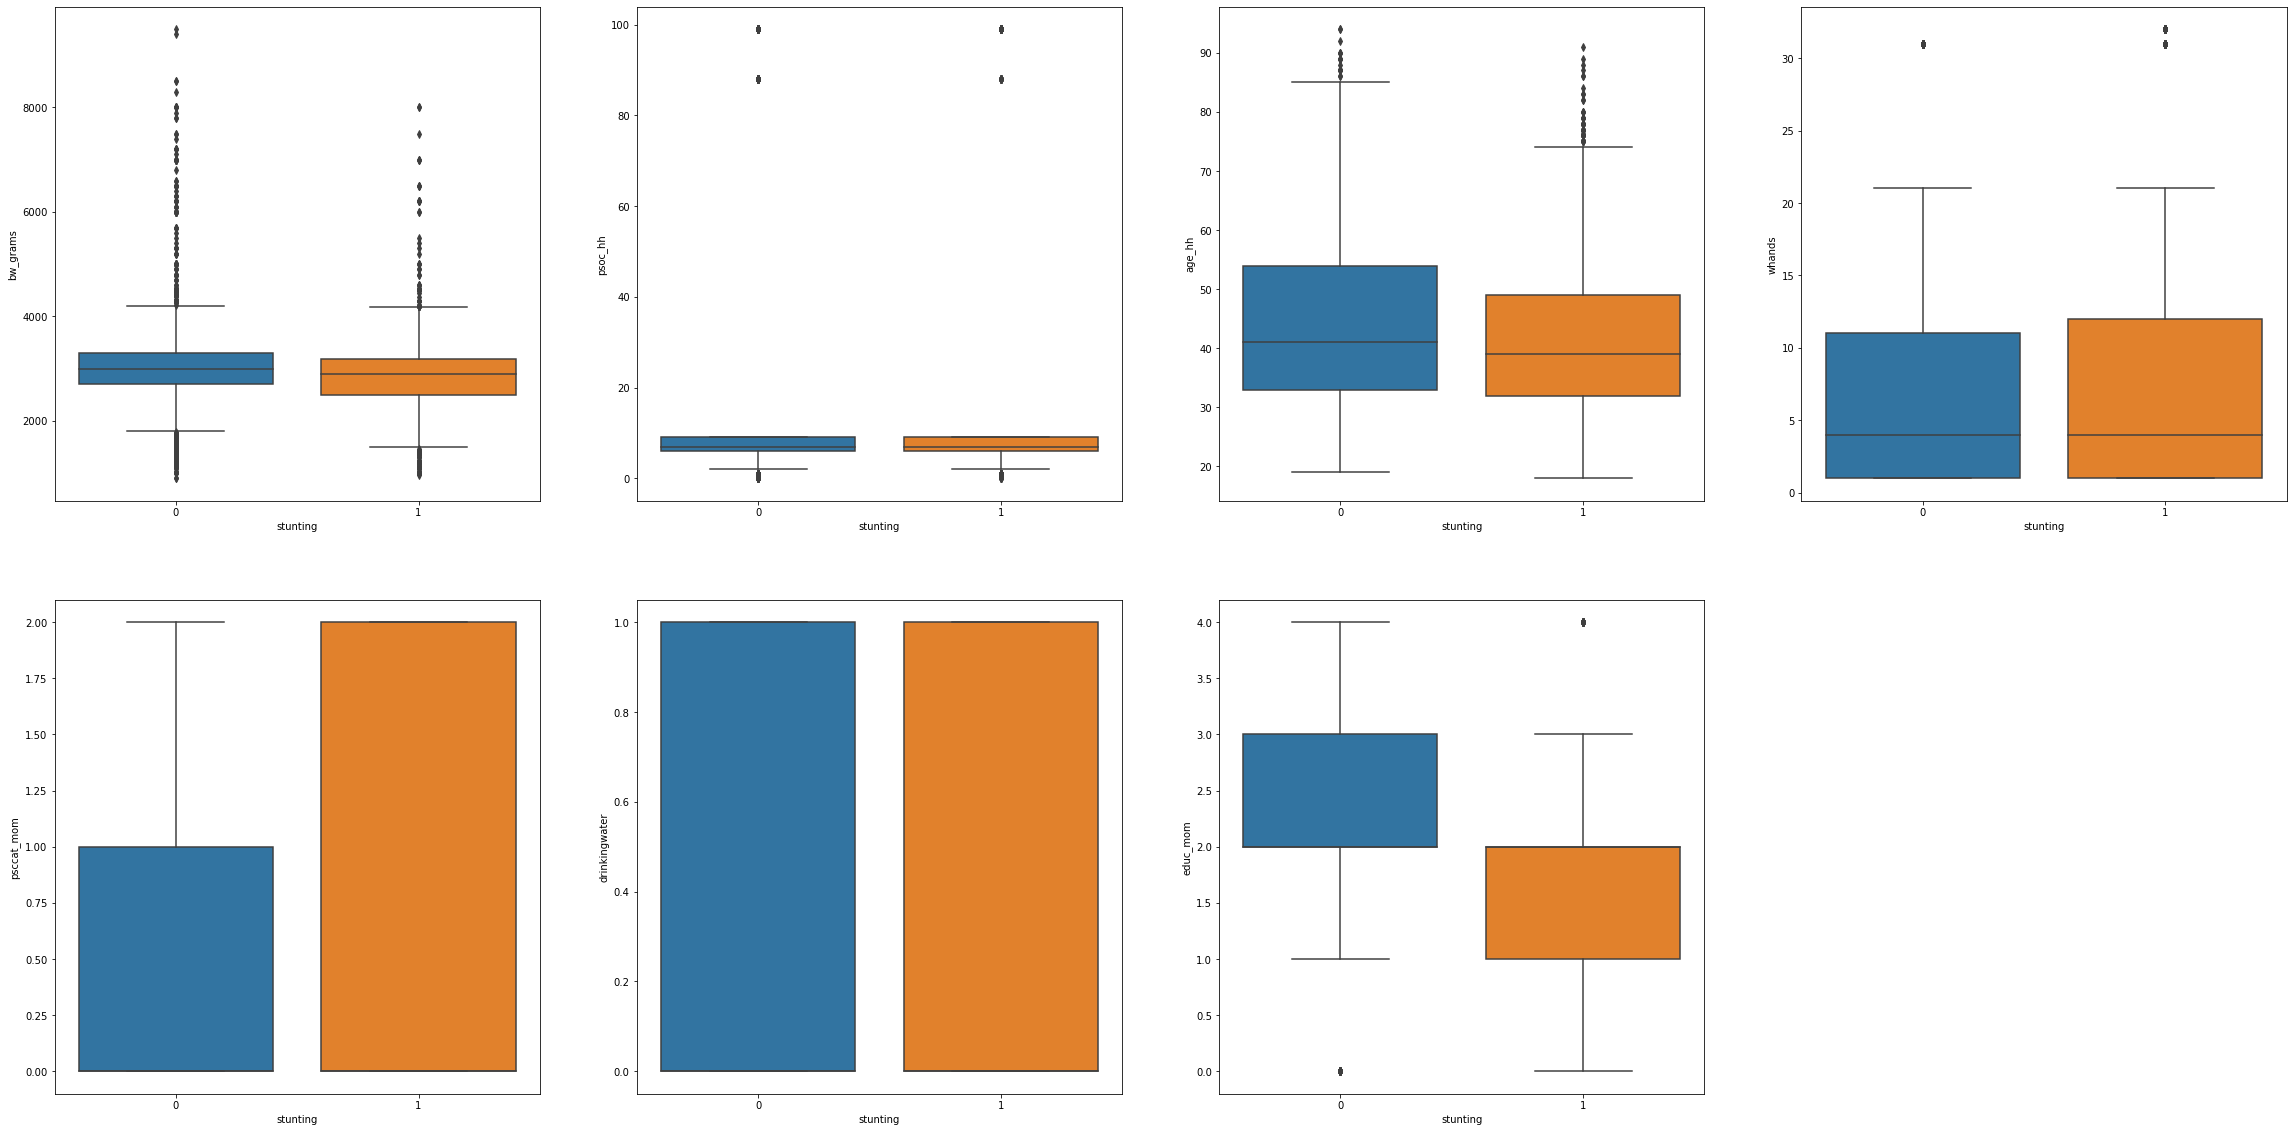

In [113]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [114]:
lr,ur=outlier(data['whands'][data.stunting==0])
data.drop(data.index[(data.whands > ur) & (data.stunting == 0)],inplace=True)
data.drop(data.index[(data.whands < lr) & (data.stunting == 0)],inplace=True)
data.value_counts('stunting')

stunting
0    8260
1    4042
dtype: int64

In [115]:
lr,ur=outlier(data['whands'][data.stunting==1])
data.drop(data.index[(data.whands > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.whands < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    8260
1    3865
dtype: int64

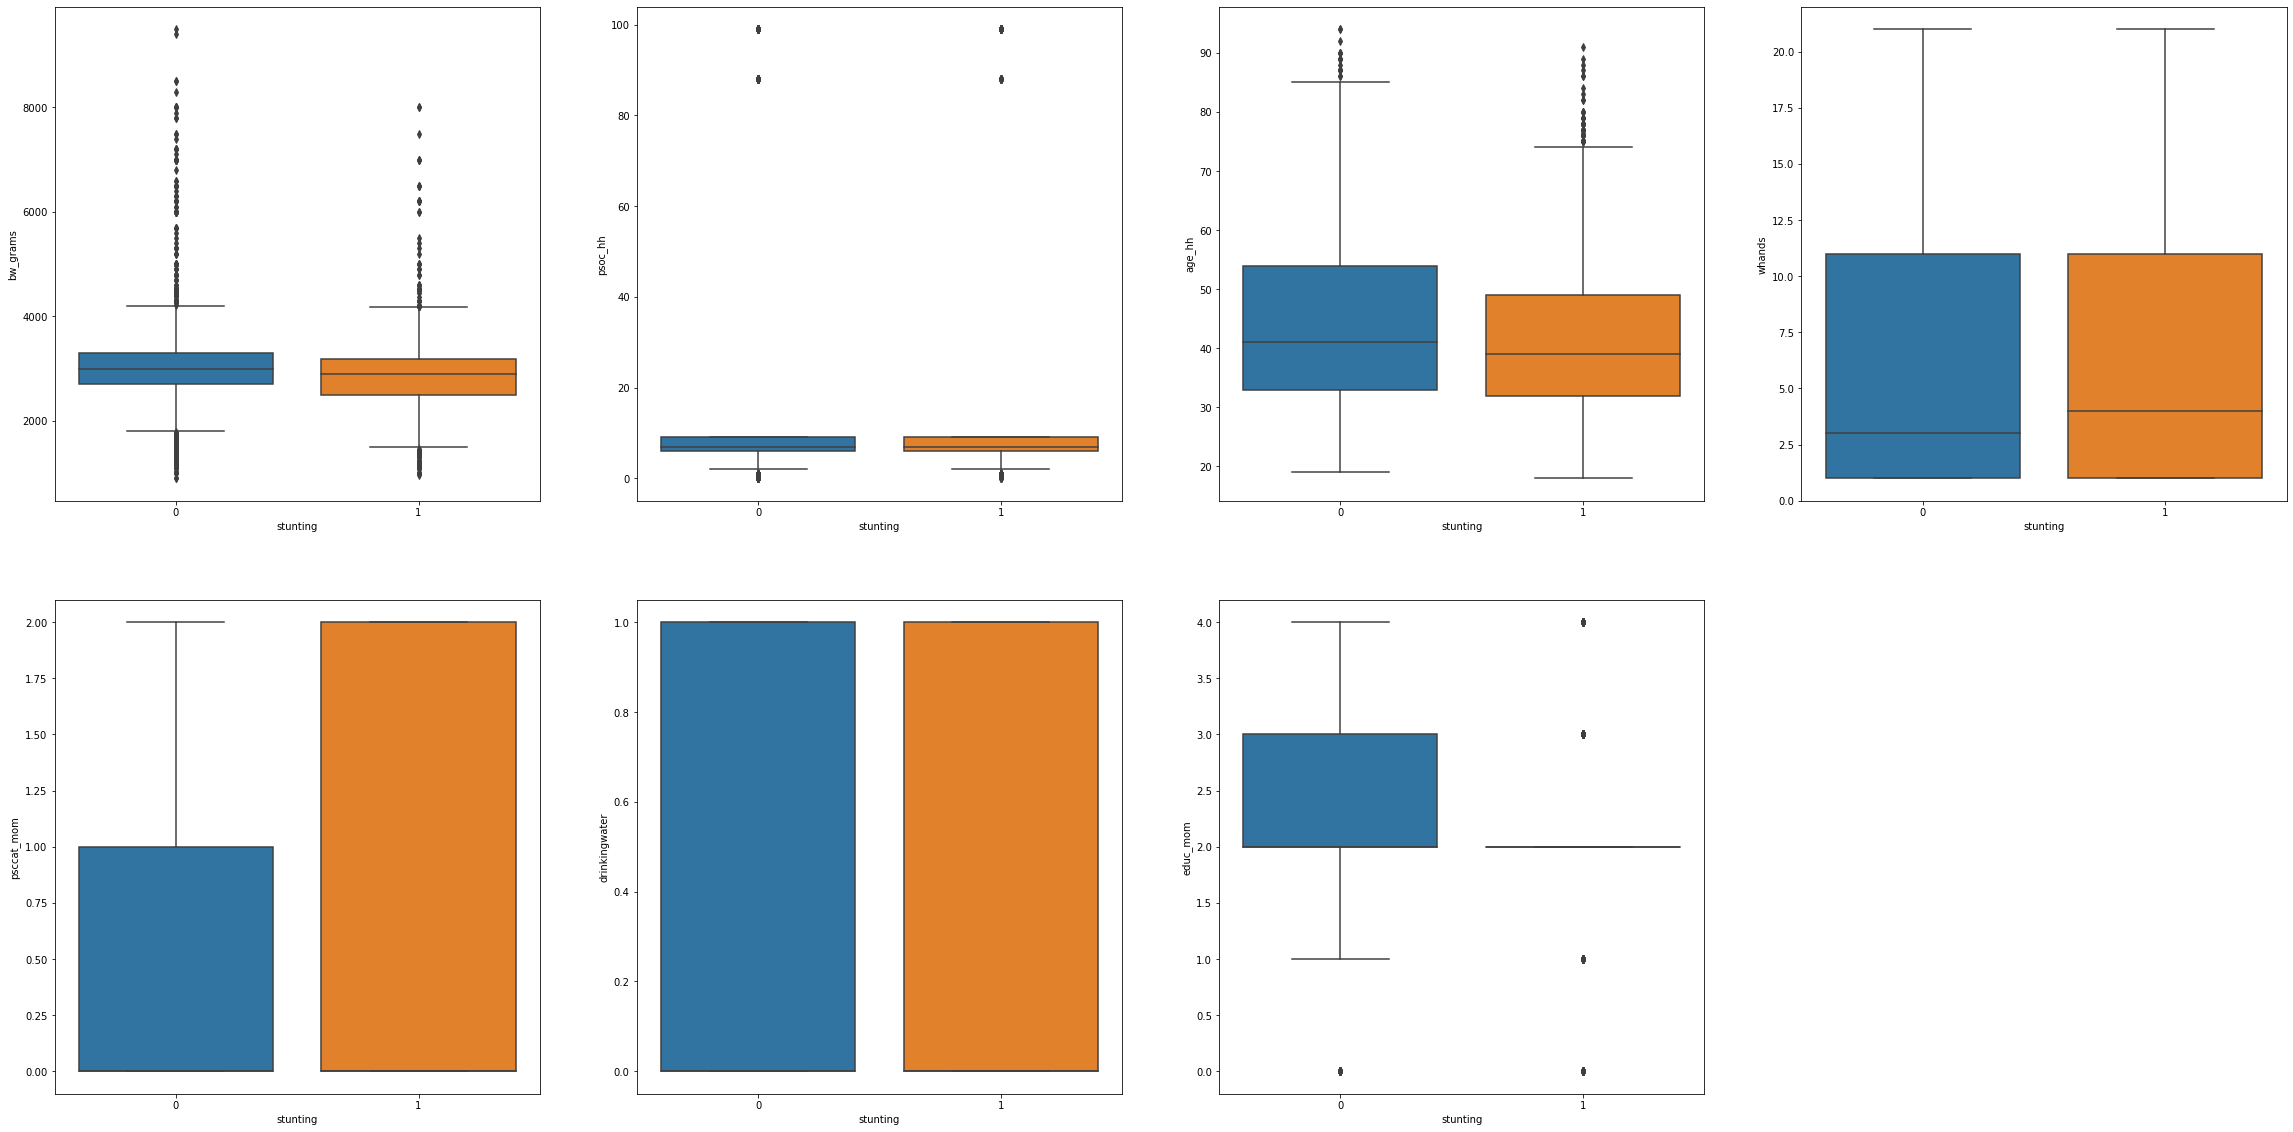

In [116]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [117]:
lr,ur=outlier(data['age_hh'][data.stunting==0])
data.drop(data.index[(data.age_hh > ur) & (data.stunting == 0)],inplace=True)
data.drop(data.index[(data.age_hh < lr) & (data.stunting == 0)],inplace=True)
data.value_counts('stunting')

stunting
0    8242
1    3865
dtype: int64

In [118]:
lr,ur=outlier(data['age_hh'][data.stunting==1])
data.drop(data.index[(data.age_hh > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.age_hh < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    8242
1    3802
dtype: int64

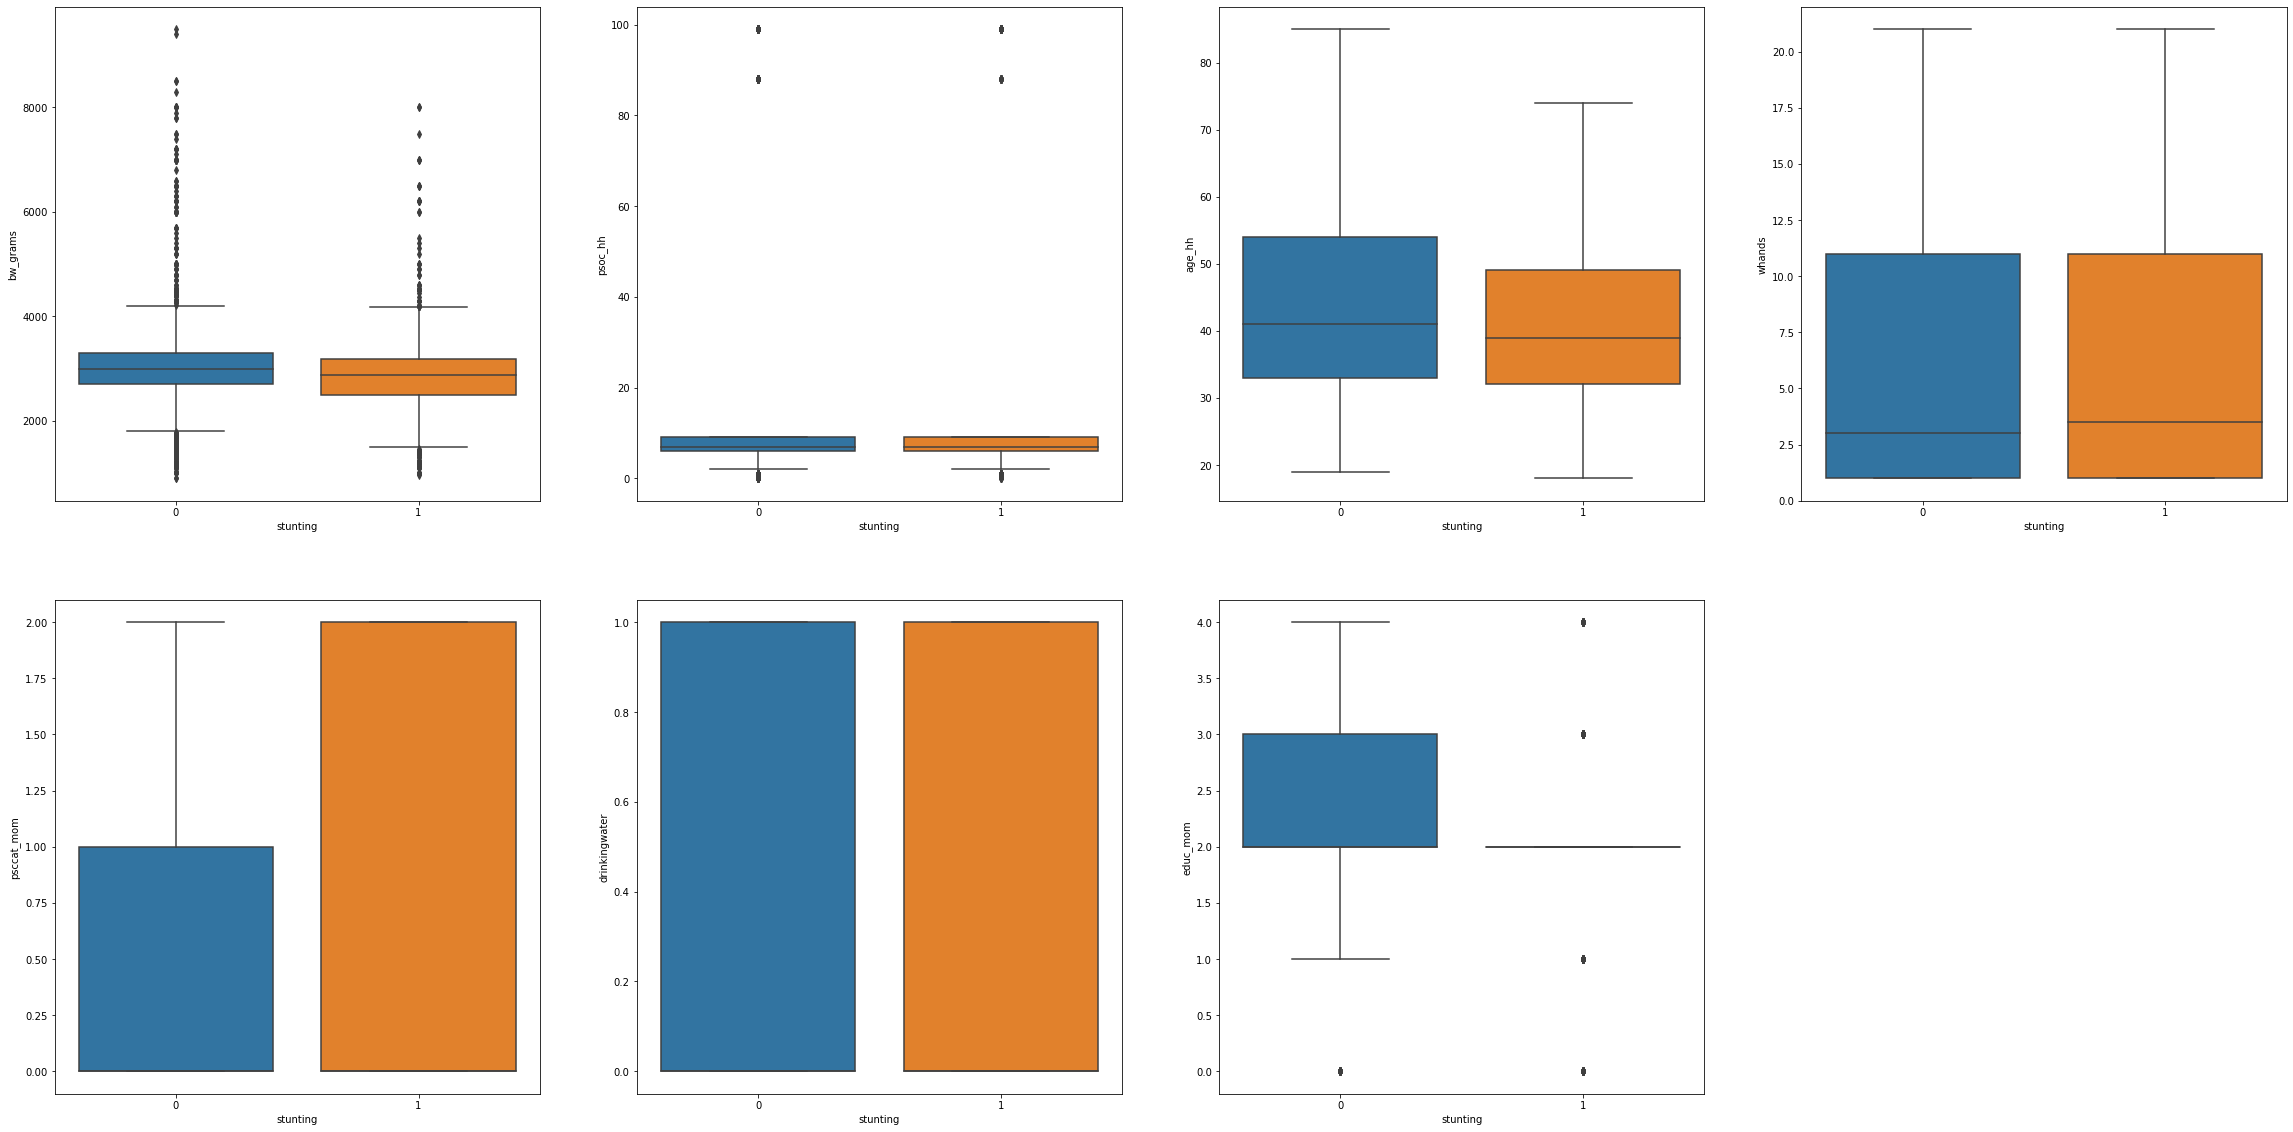

In [119]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [120]:
lr,ur=outlier(data['psoc_hh'][data.stunting==0])
data.drop(data.index[(data.psoc_hh > ur) & (data.stunting == 0)],inplace=True)
data.drop(data.index[(data.psoc_hh < lr) & (data.stunting == 0)],inplace=True)
data.value_counts('stunting')

stunting
0    6702
1    3802
dtype: int64

In [121]:
lr,ur=outlier(data['psoc_hh'][data.stunting==1])
data.drop(data.index[(data.psoc_hh > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.psoc_hh < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    6702
1    3360
dtype: int64

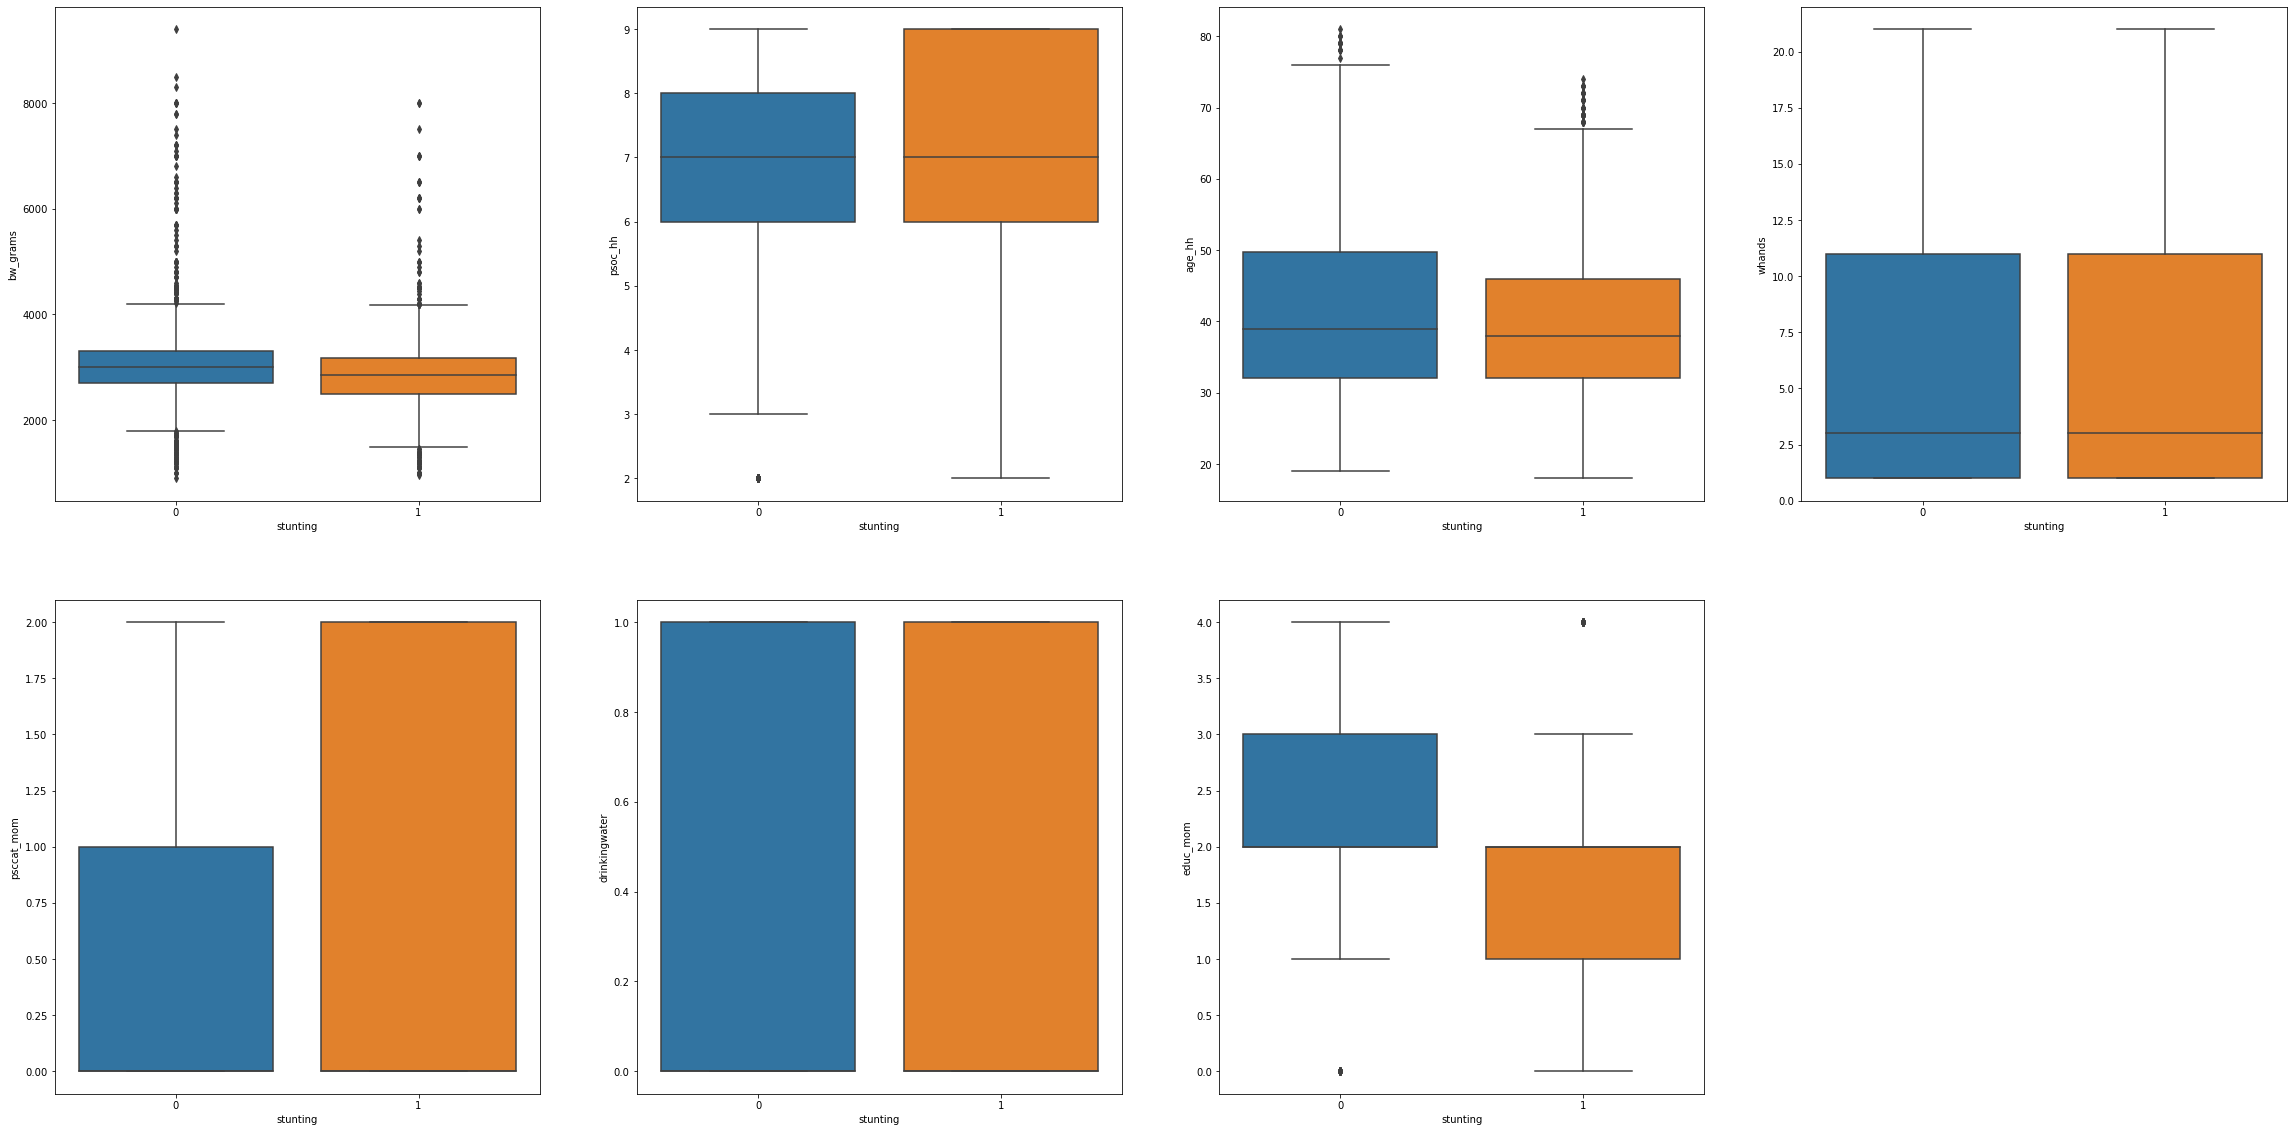

In [122]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [123]:
lr,ur=outlier(data['bw_grams'][data.stunting==0])
data.drop(data.index[(data.bw_grams > ur) & (data.stunting == 0)],inplace=True)
data.drop(data.index[(data.bw_grams < lr) & (data.stunting == 0)],inplace=True)
data.value_counts('stunting')

stunting
0    6492
1    3360
dtype: int64

In [124]:
lr,ur=outlier(data['bw_grams'][data.stunting==1])
data.drop(data.index[(data.bw_grams > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.bw_grams < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    6492
1    3270
dtype: int64

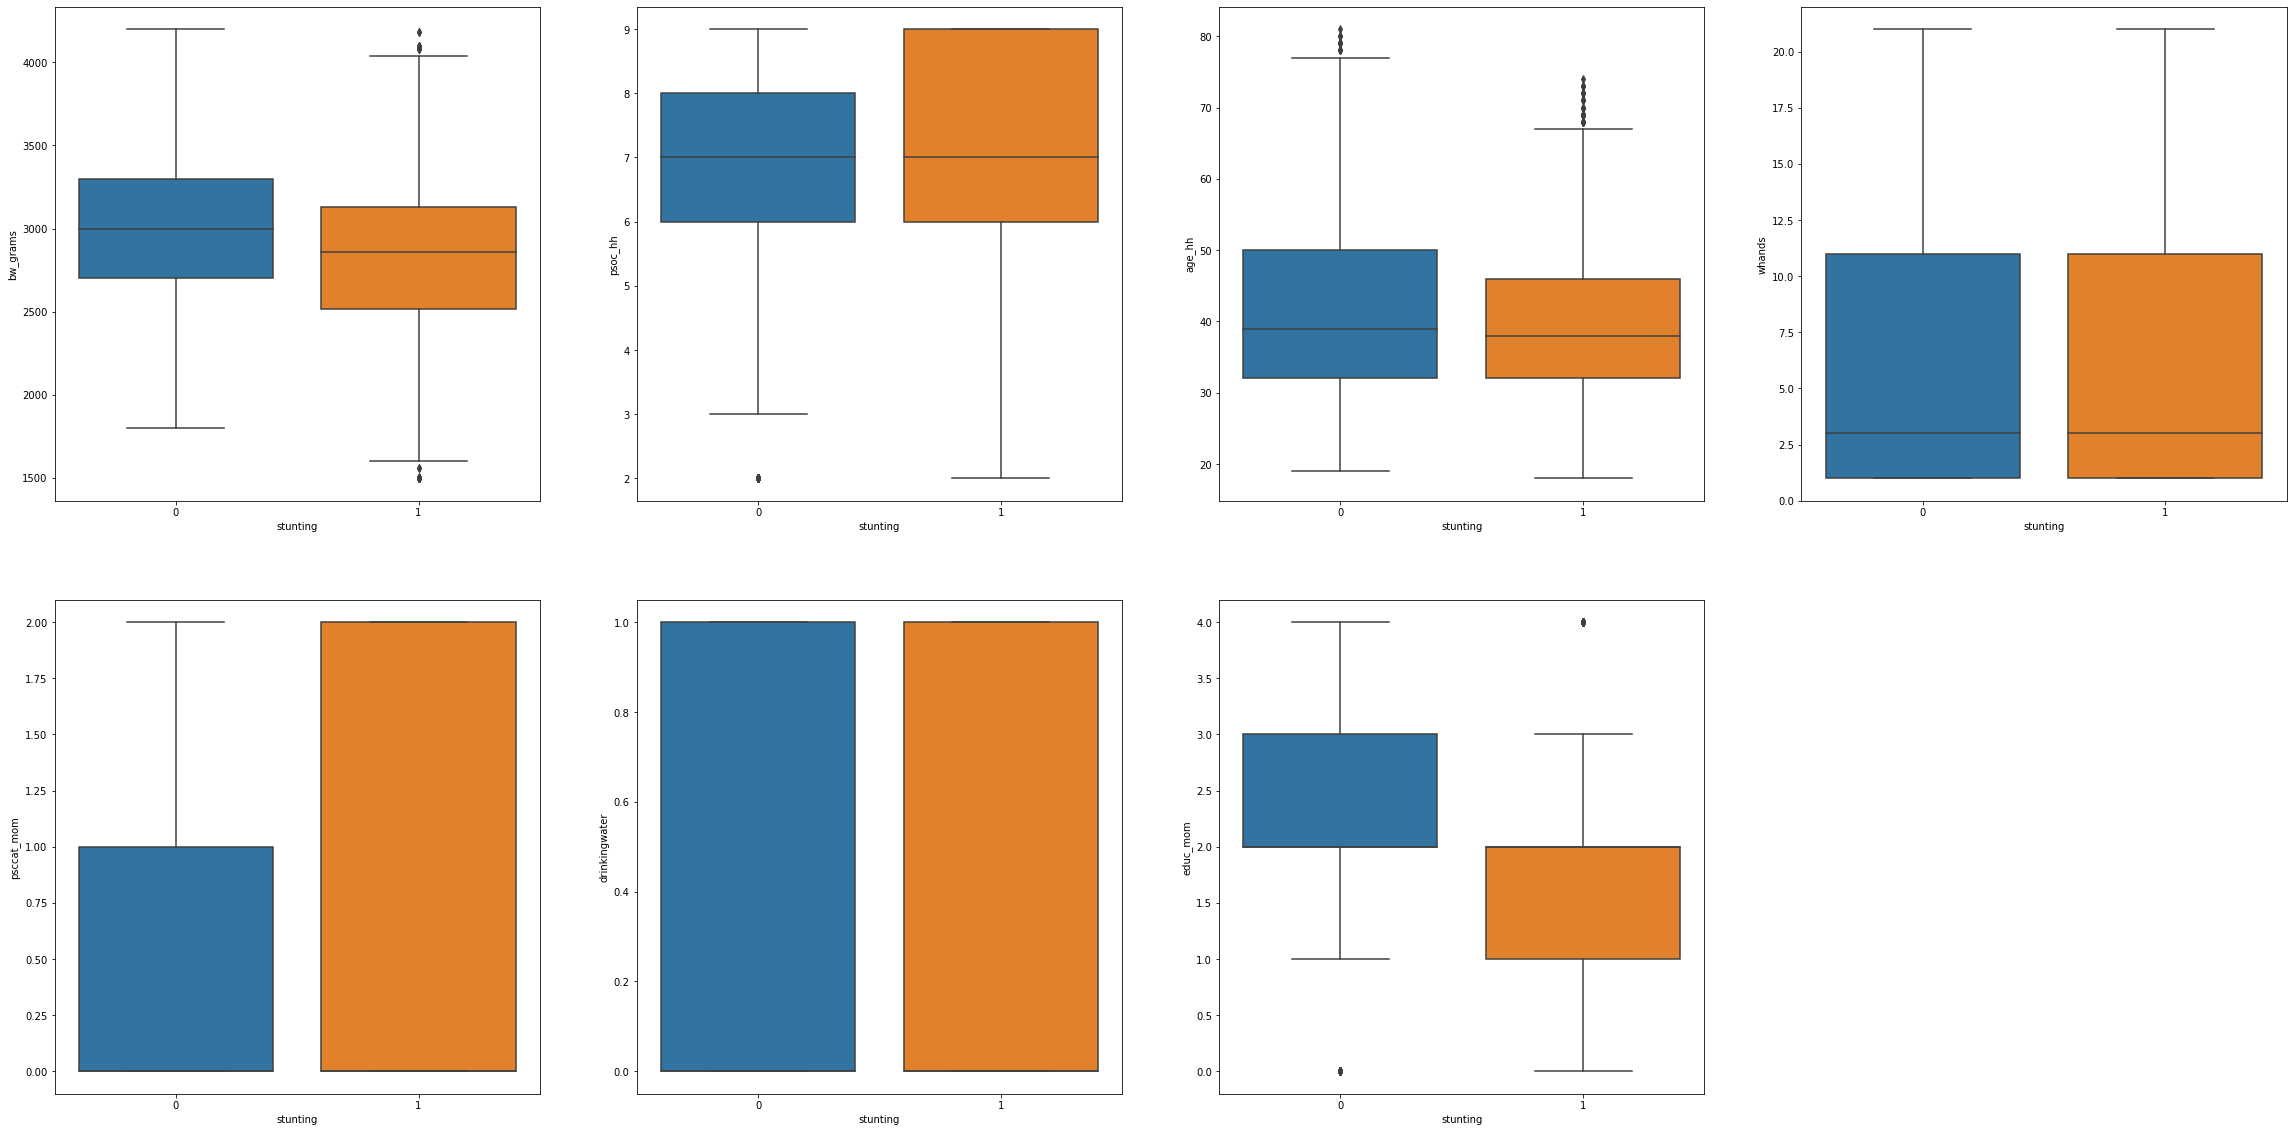

In [125]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [126]:
lr,ur=outlier(data['bw_grams'][data.stunting==1])
data.drop(data.index[(data.bw_grams > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.bw_grams < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    6492
1    3242
dtype: int64

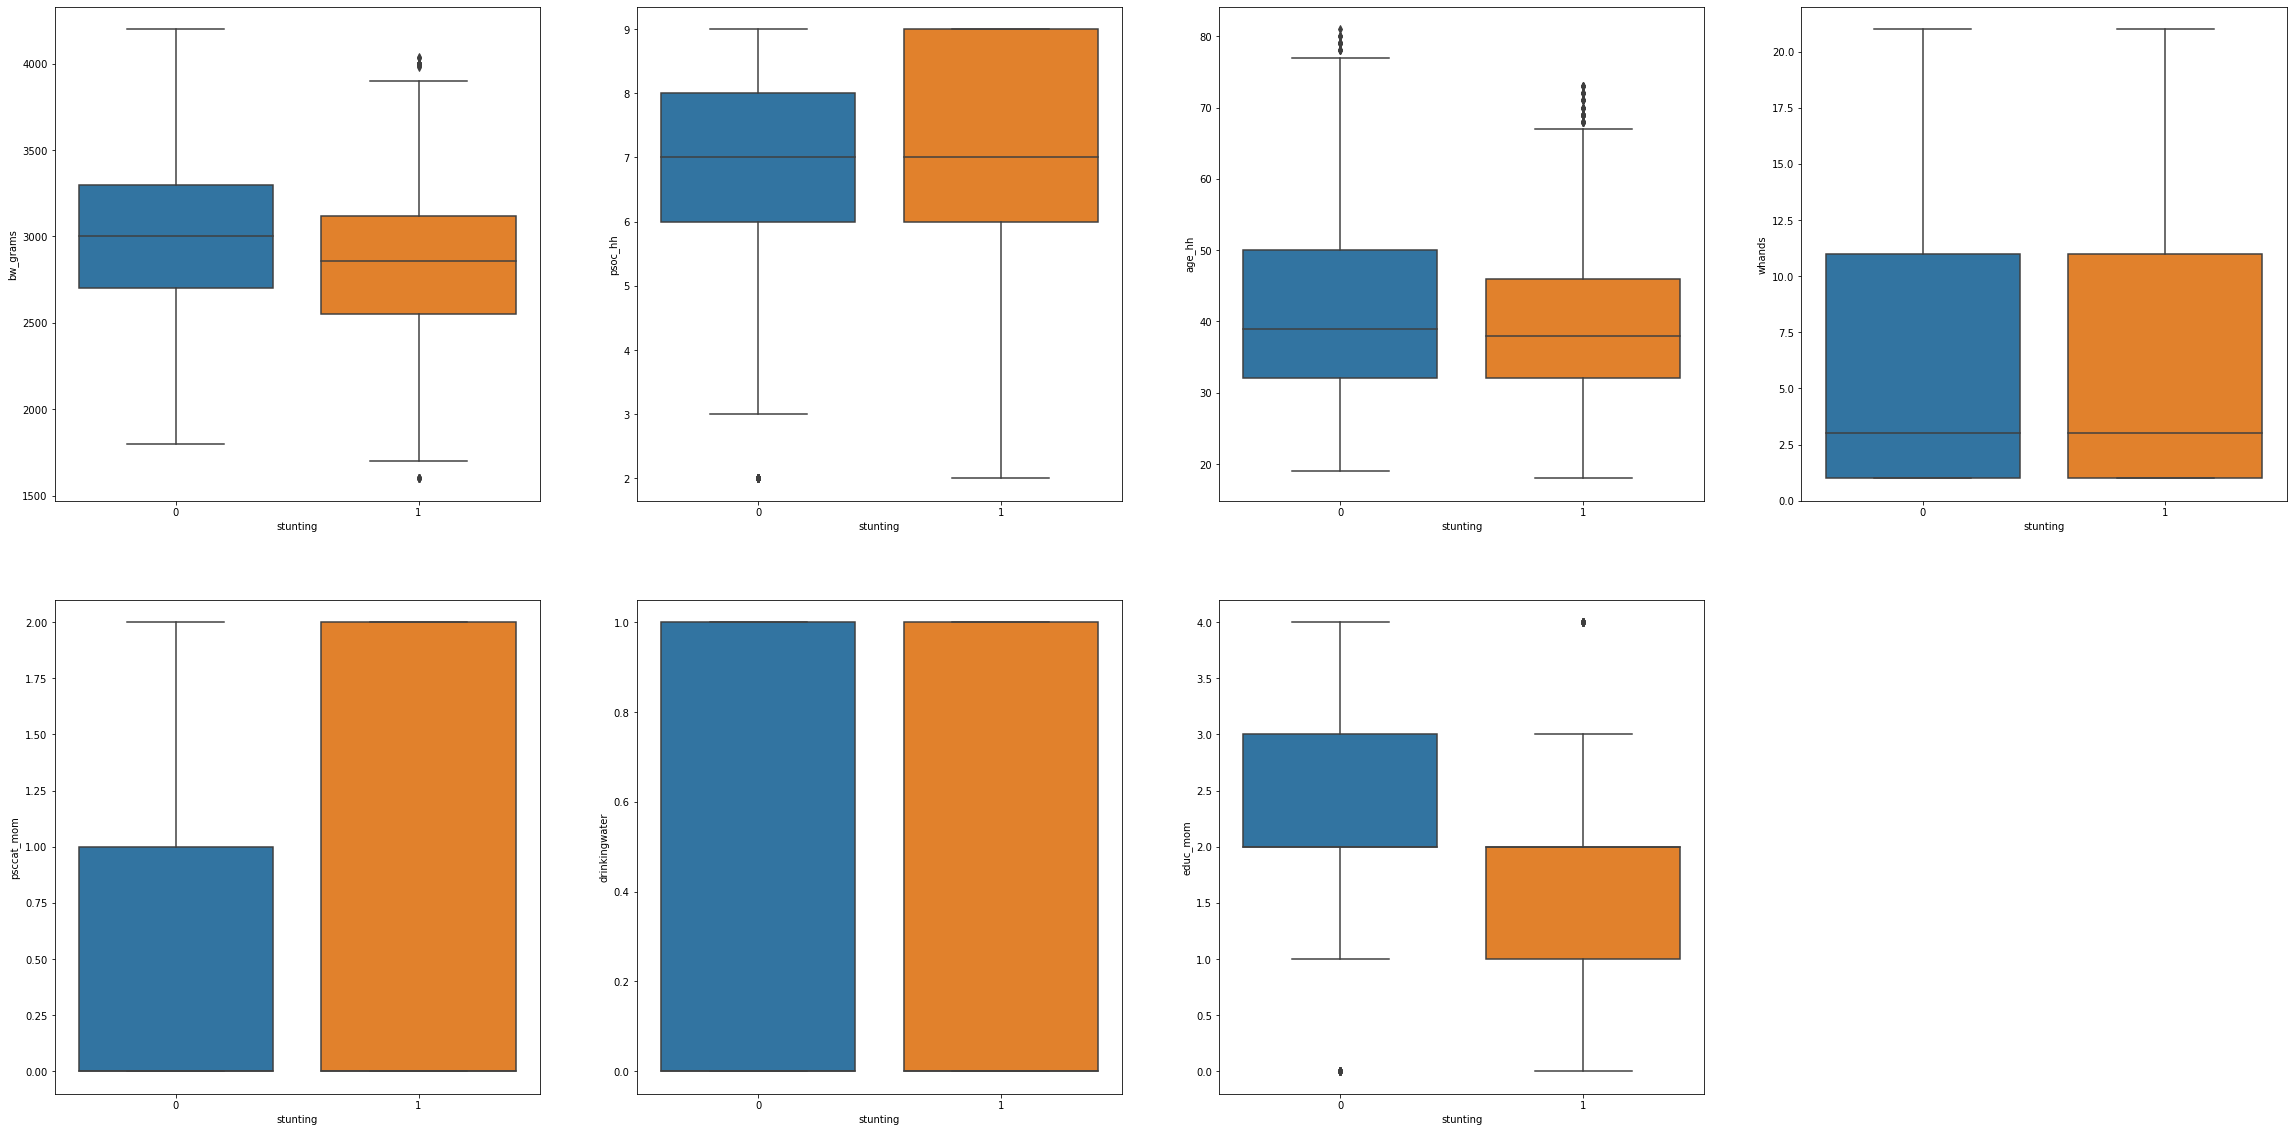

In [127]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [128]:
lr,ur=outlier(data['bw_grams'][data.stunting==1])
data.drop(data.index[(data.bw_grams > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.bw_grams < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    6492
1    3204
dtype: int64

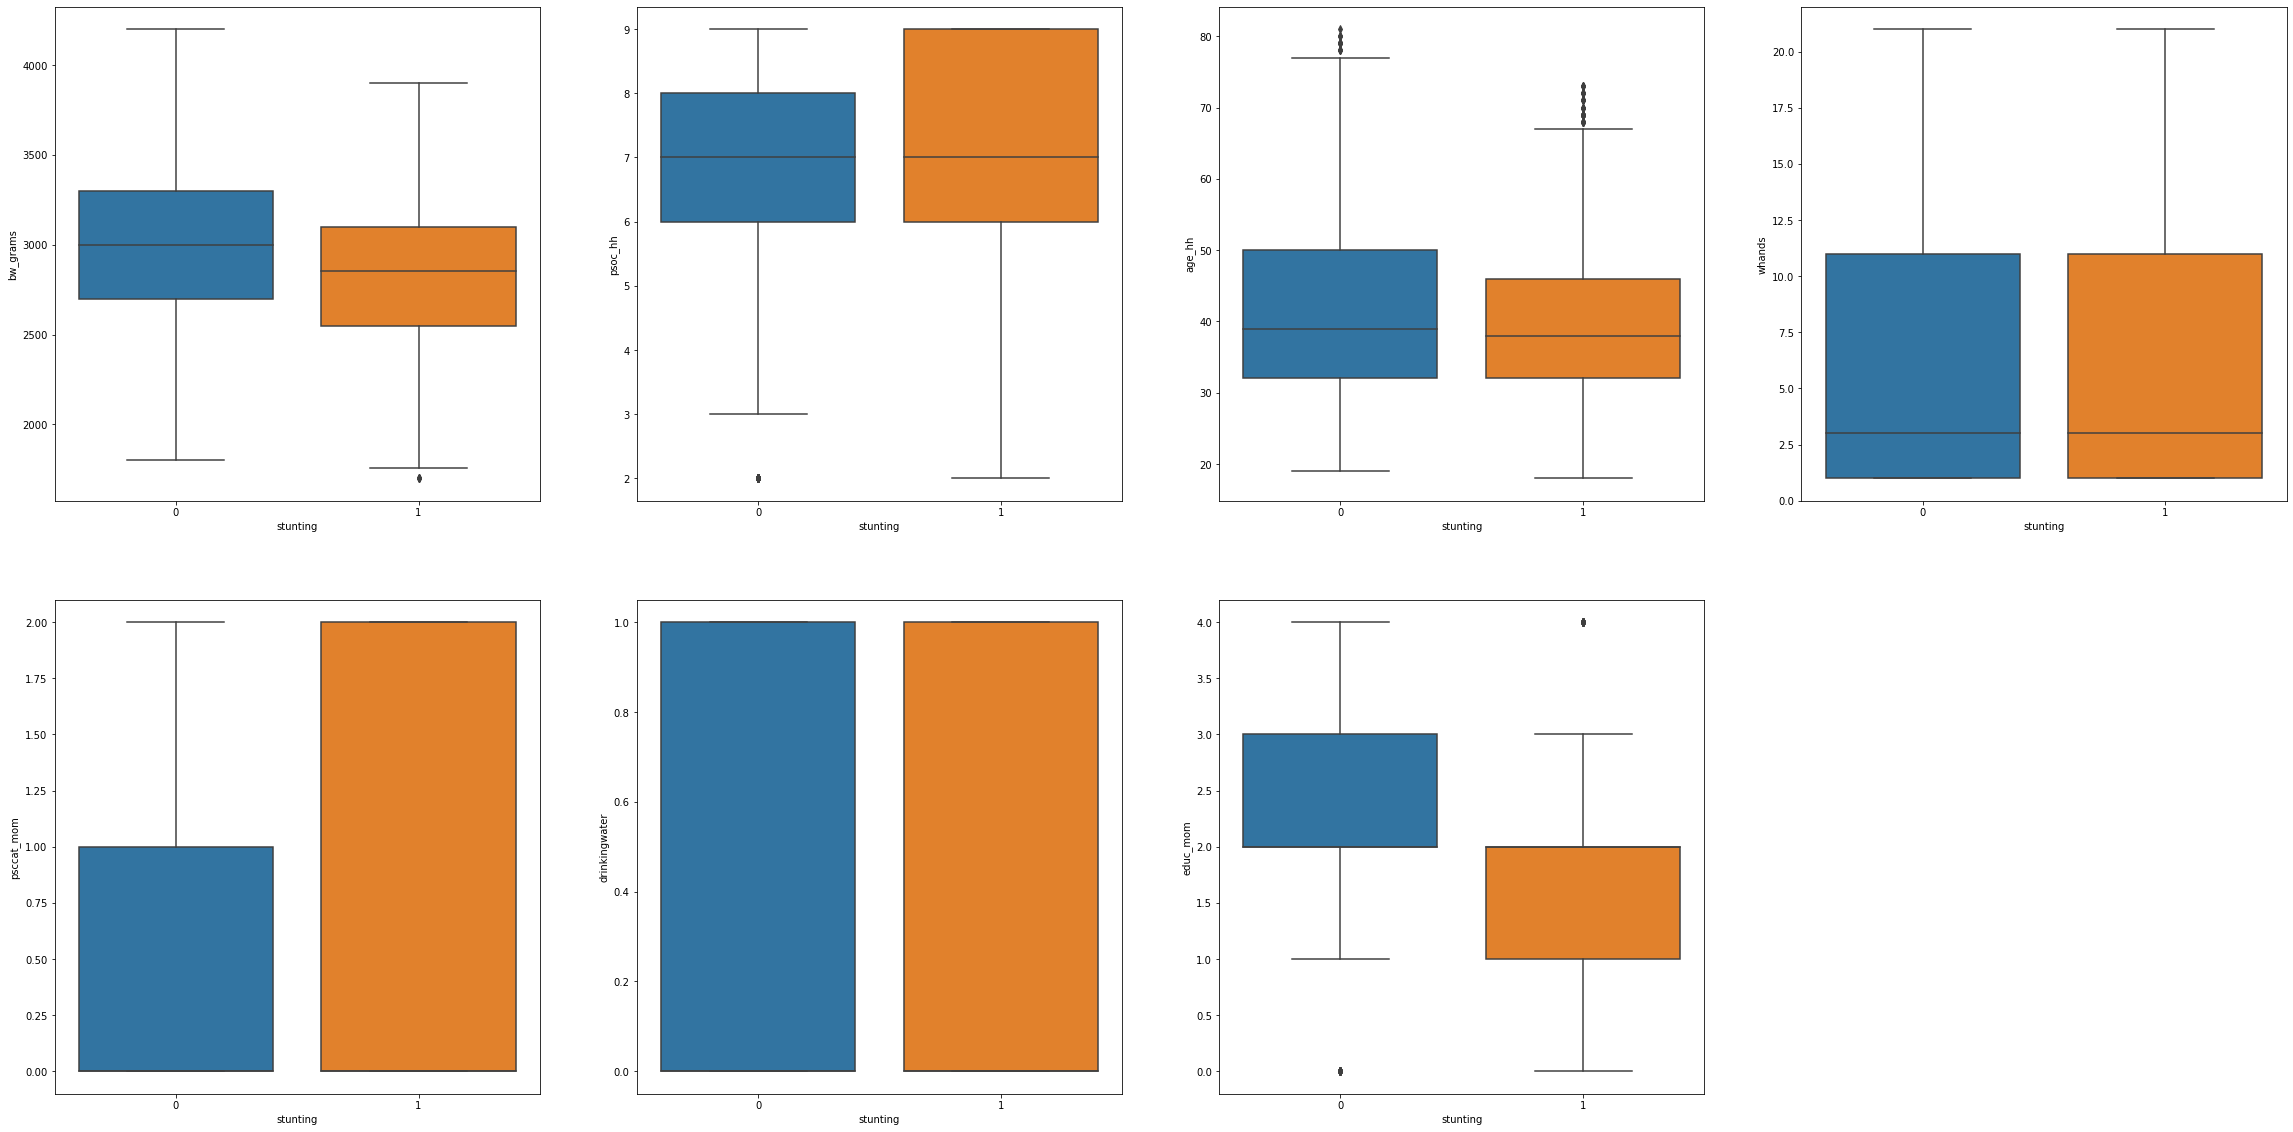

In [129]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [130]:
lr,ur=outlier(data['age_hh'][data.stunting==1])
data.drop(data.index[(data.age_hh > ur) & (data.stunting == 1)],inplace=True)
data.drop(data.index[(data.age_hh < lr) & (data.stunting == 1)],inplace=True)
data.value_counts('stunting')

stunting
0    6492
1    3162
dtype: int64

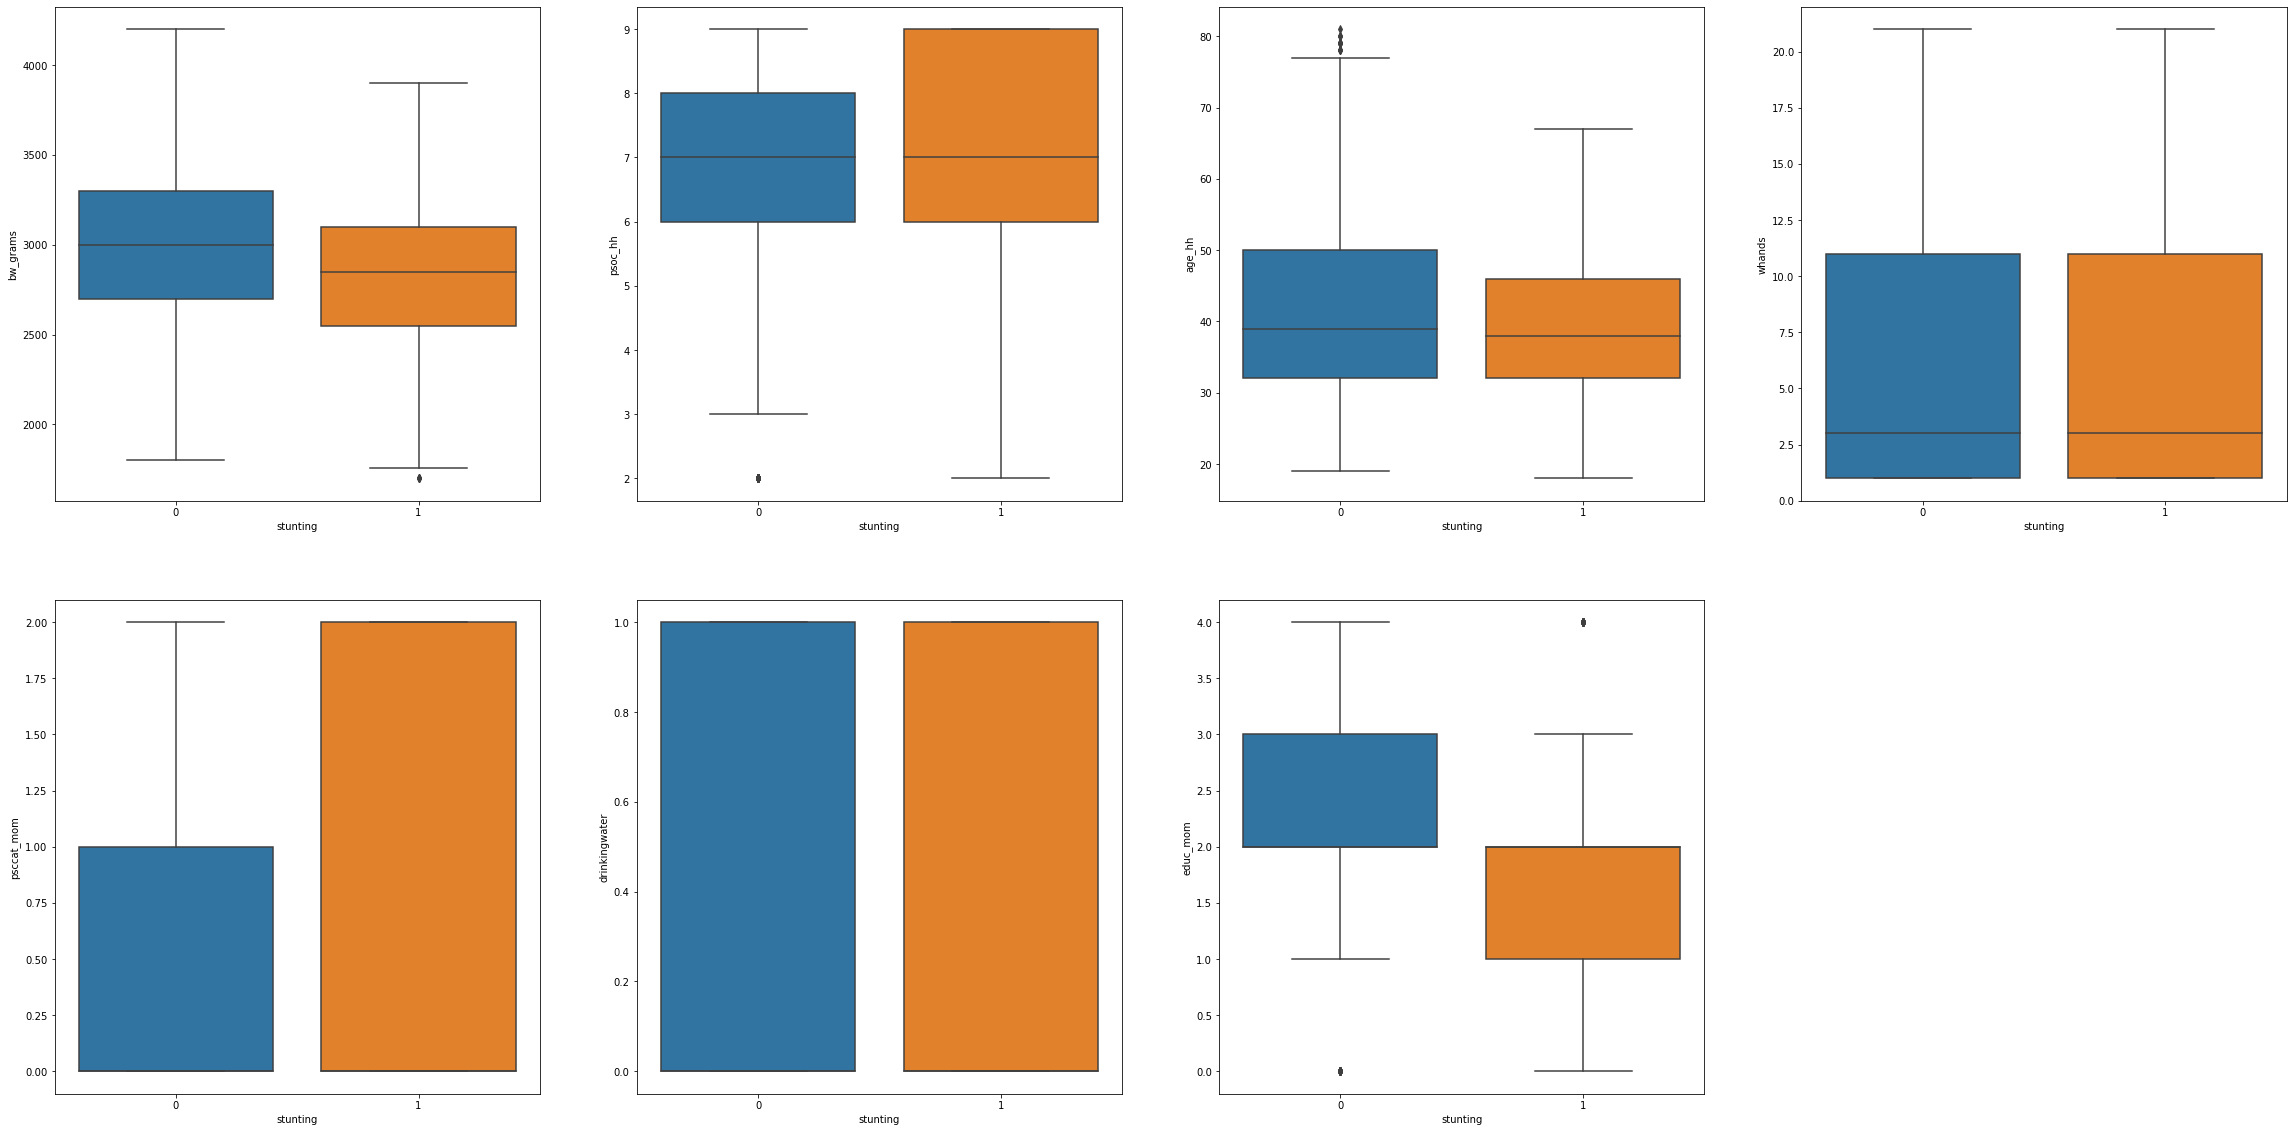

In [131]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [132]:
lr,ur=outlier(data['age_hh'][data.stunting==0])
data.drop(data.index[(data.age_hh > ur) & (data.stunting == 0)],inplace=True)
data.drop(data.index[(data.age_hh < lr) & (data.stunting == 0)],inplace=True)
data.value_counts('stunting')

stunting
0    6476
1    3162
dtype: int64

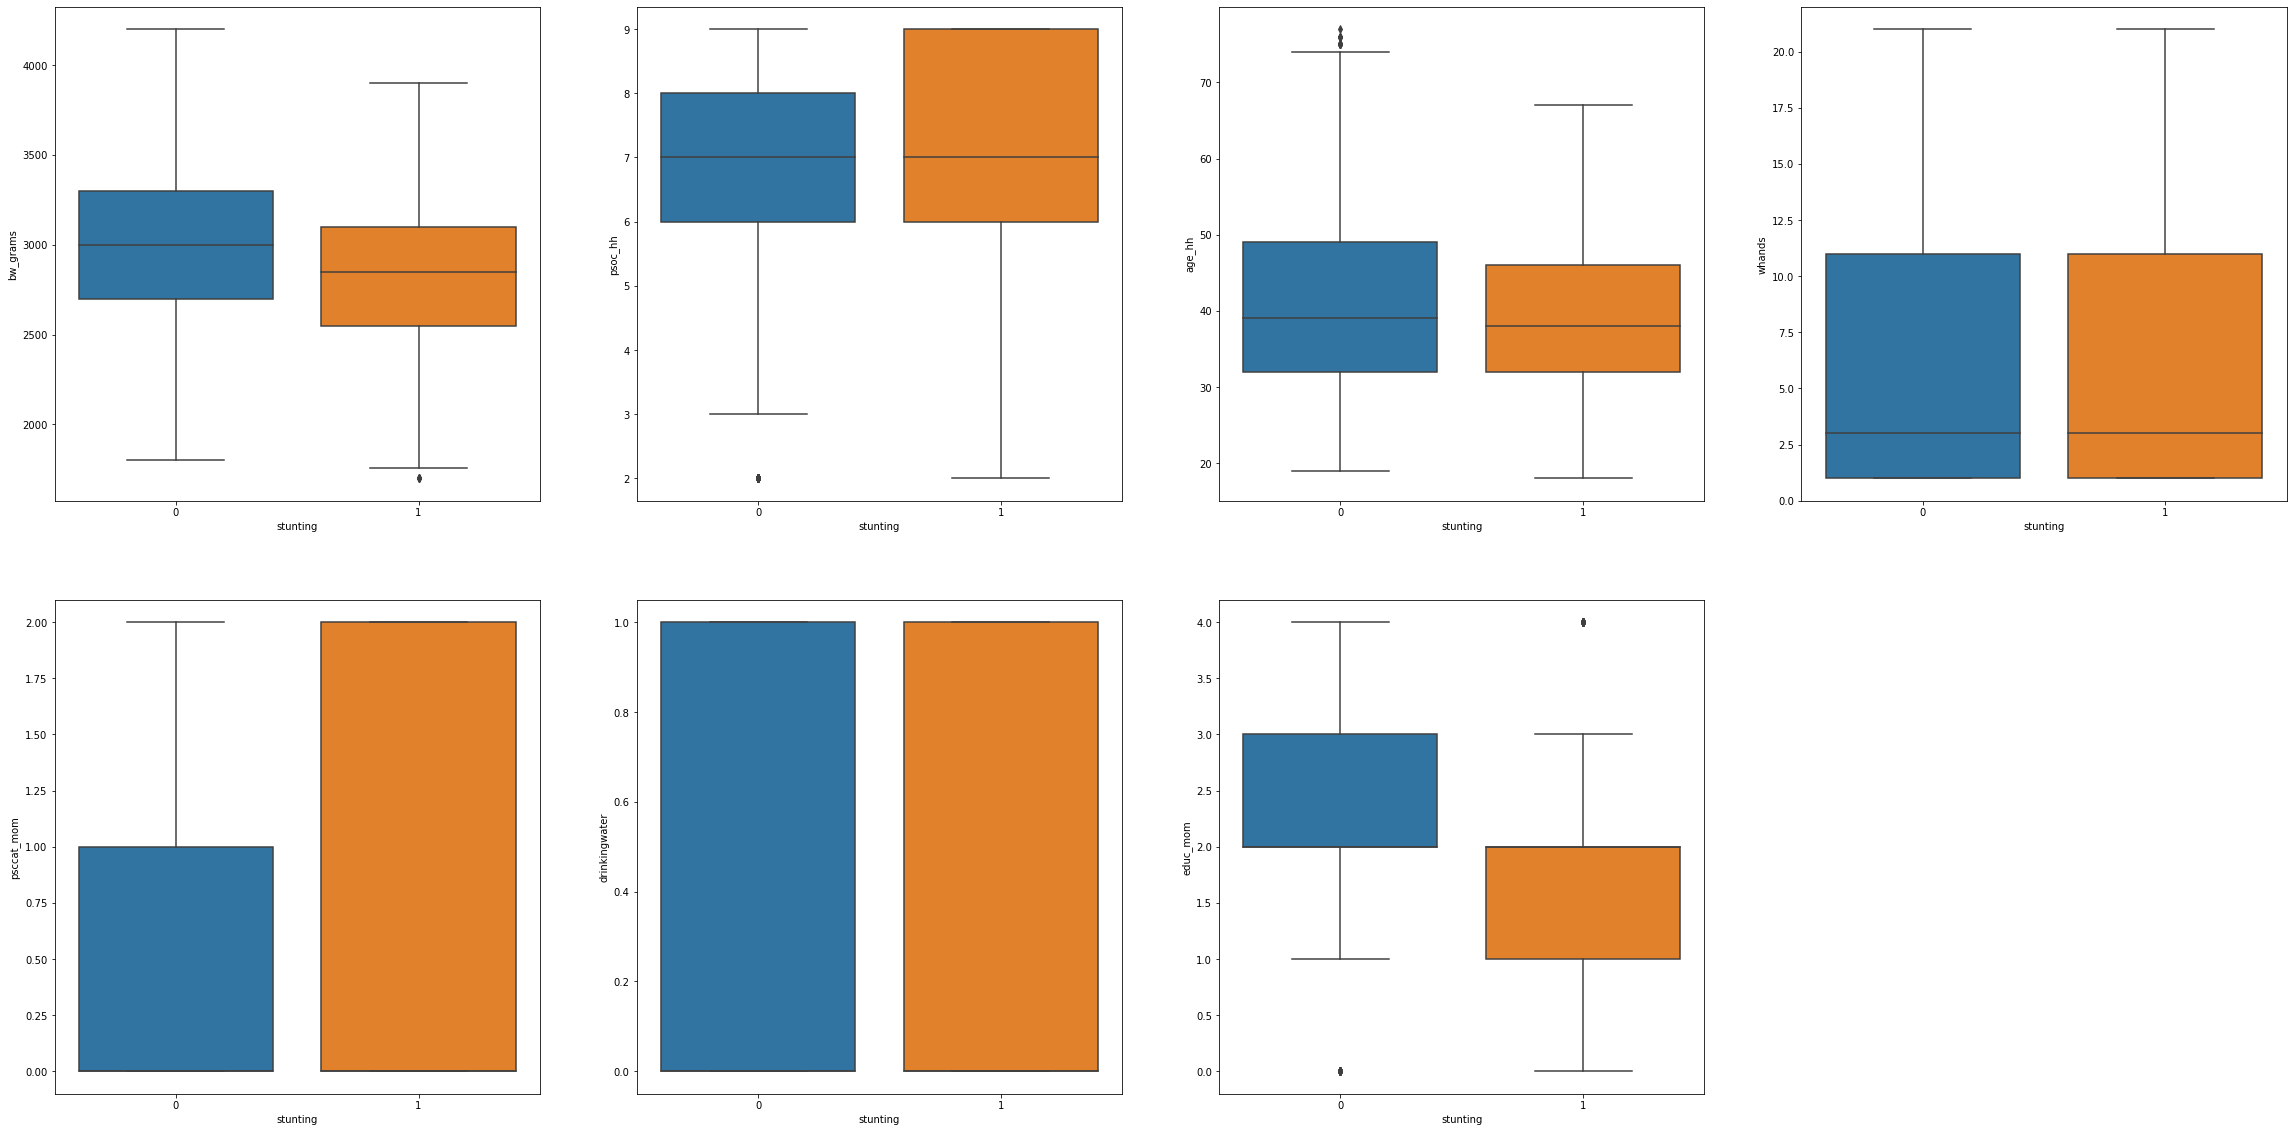

In [133]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [134]:
lr,ur=outlier(data['age_hh'][data.stunting==0])
data.drop(data.index[(data.age_hh > ur) & (data.stunting == 0)],inplace=True)
data.drop(data.index[(data.age_hh < lr) & (data.stunting == 0)],inplace=True)
data.value_counts('stunting')

stunting
0    6461
1    3162
dtype: int64

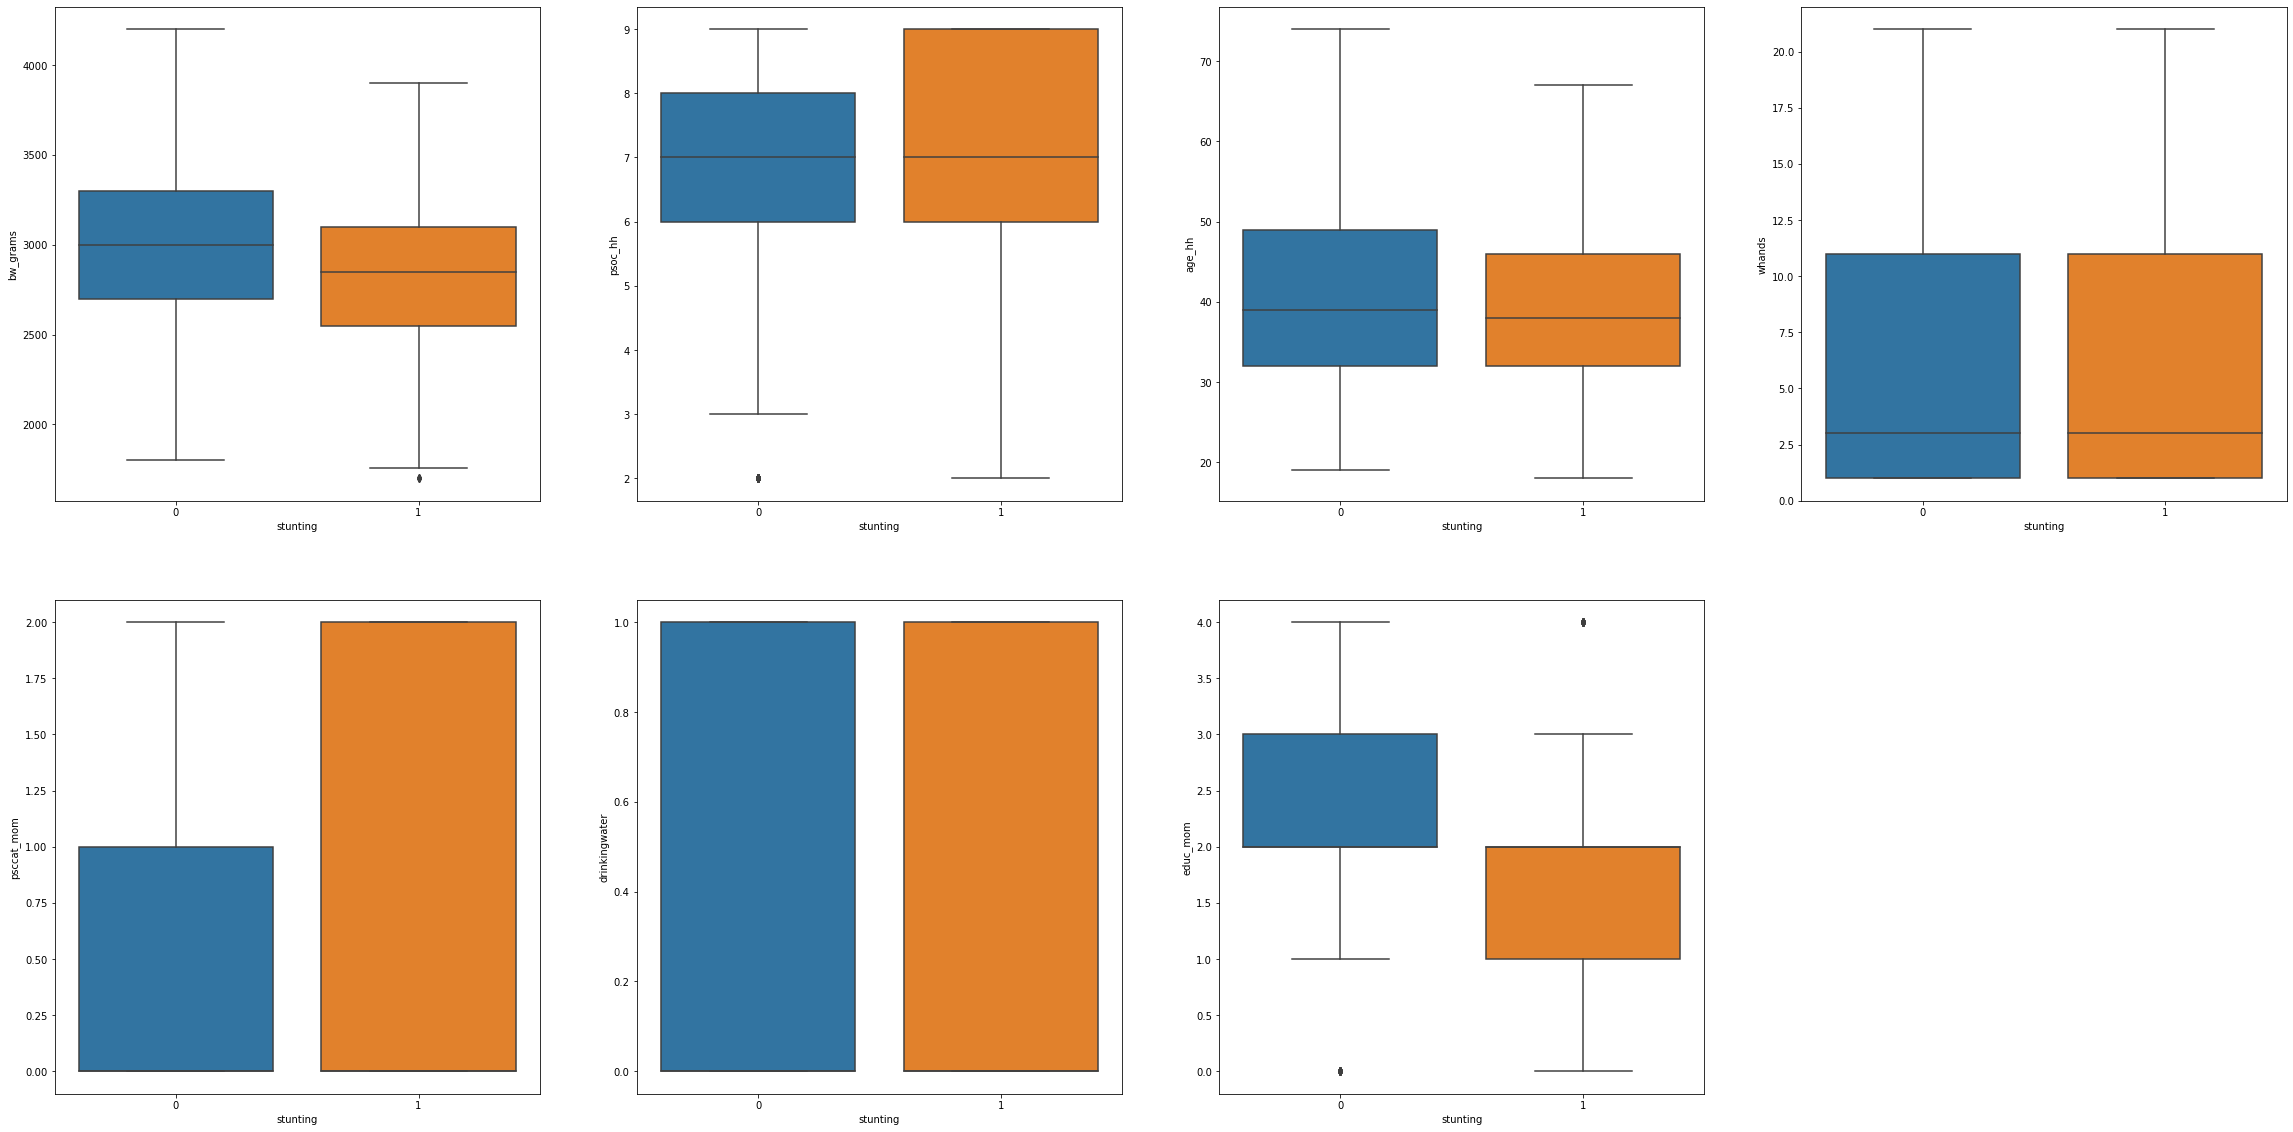

In [135]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="stunting", y=y, data=data)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('whands')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [137]:
Final1 = data[["bw_grams","psoc_hh","age_hh",
               "whands","psccat_mom","drinkingwater","educ_mom"]]
Target1 =data['stunting']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final1,Target1,test_size = 0.2, random_state=42)

In [143]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.676
Accuracy score : 0.694025974025974


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)
rf =accuracy_score(rf_pred,y_test)

Training score: 0.987
Accuracy score:  0.6446753246753246


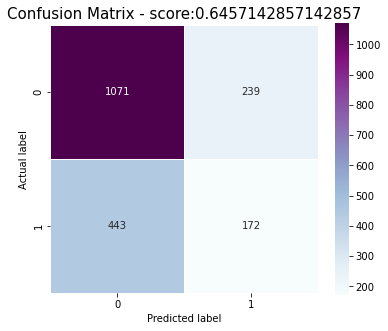

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1310
           1       0.42      0.28      0.34       615

    accuracy                           0.65      1925
   macro avg       0.56      0.55      0.55      1925
weighted avg       0.62      0.65      0.62      1925



In [145]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [147]:
data['stunting'].value_counts()

0    6461
1    3162
Name: stunting, dtype: int64

In [148]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.stunting==0]
df_2 = data[data.stunting==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=6461,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stunting.value_counts()
df_upsampled.reset_index(drop=True)

,bw_grams,psoc_hh,age_hh,whands,psccat_mom,drinkingwater,educ_mom,stunting
0,3200,6,36,2,0,0,2,0
1,2800,8,44,2,0,1,2,0
2,2700,8,44,2,0,1,3,0
3,3000,6,49,2,0,0,2,0
4,3500,7,46,1,0,1,1,0
...,...,...,...,...,...,...,...,...
12917,2000,9,42,4,0,0,2,1
12918,2722,6,50,2,2,0,2,1
12919,3020,8,30,4,0,0,1,1
12920,3000,8,46,1,0,0,3,1


In [149]:
Final = df_upsampled[["bw_grams","psoc_hh","age_hh",
               "whands","psccat_mom","drinkingwater","educ_mom"]]
Target =df_upsampled['stunting']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [151]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.598
Accuracy score : 0.6123791102514506


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.992
Accuracy score:  0.8139264990328821


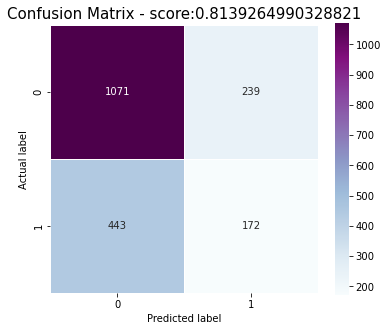

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1165
           1       0.87      0.77      0.82      1420

    accuracy                           0.81      2585
   macro avg       0.82      0.82      0.81      2585
weighted avg       0.82      0.81      0.81      2585



In [152]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(rf_pred,y_test))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)

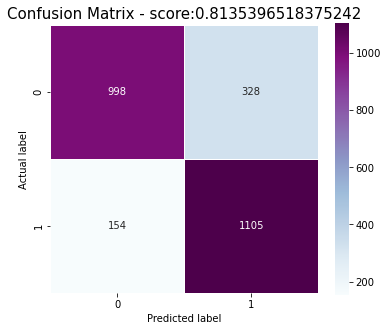

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1326
           1       0.77      0.88      0.82      1259

    accuracy                           0.81      2585
   macro avg       0.82      0.82      0.81      2585
weighted avg       0.82      0.81      0.81      2585



In [153]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)